In [18]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [20]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37216        3  NASHVILLE  75820.997821400058  188884682.28344727   
2  37204        9  NASHVILLE  93180.292250425613  200664795.51708984   
3  37027       11  BRENTWOOD   159760.6942933173  174978422.04101562   
4  37064       18   FRANKLIN  28995.828320601937  46969608.005737305   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...  
2  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...  
3  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...  
4  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...

In [21]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


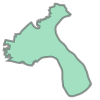

In [86]:
zipcodes.loc[0, 'geometry']

#### ...and printing it


In [87]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.68714696276101 36.318206917893, -86.68711218725601 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.68703469075101 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.68690382778099 36.318191625285, -86.68686914958001 36.318189102792, -86.68683443743301 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.68655731872499 36.318162634491, -86.686522735235 36.318159287854, -86.68648815149901 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813001 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549014999 36

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


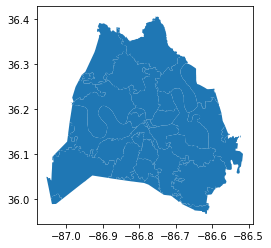

In [22]:
zipcodes.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by `matplotib`

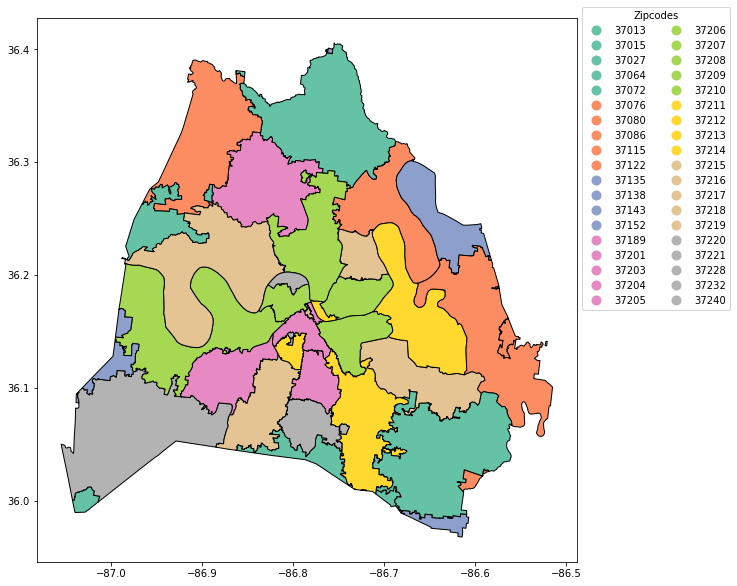

In [23]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

##### Next we will read in the Tornado Sirens Data
- The Tornado Siren Locations data was downloaded from https://data.nashville.gov/Emergency-Management/Tornado-Siren-Locations-Map-/wuw4-cqv8
- created a new data frame to parse `lat` and `lng` columns from `location`

In [6]:
siren_locations = pd.read_csv('../data/Tornado_Siren_Locations.csv')
print(siren_locations.shape)
siren_locations.head(3)



(93, 6)


Site Name                 Address       City    Zip Siren Power  \
0       Ezell Road Park      5135 Harding Place  Nashville  37211   Eclipse 8   
1           Sevier Park  3000 Granny White Pike  Nashville  37204   Eclipse 8   
2  Fannie May Dees Park      2401 Blakemore Ave  Nashville  37212   Eclipse 8   

                  Location  
0  (36.090944, -86.686028)  
1  (36.118861, -86.787889)  
2    (36.136167, -86.8055)

- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [7]:
'''strip leading and trailing () in the location column as well if there is a space between)'''

siren_locations["Location2"] = siren_locations["Location"].str.strip(' ()')
'''Extract Latitute and Longitude via a split function at ',' in the location2 column '''
position=siren_locations["Location2"].str.split(",", n = 1, expand = True)
'''Create new columns from the position data frame'''
# making separate lat column from position data frame and type = float
siren_locations["lat"]=position[0].astype(float)
# making separate lng column from position data frame and type= float
siren_locations["lng"]=position[1].astype(float)
#not sure if i need to strip the space before lng
#siren_locations["lng"]=siren_locations["lng"].str.lstrip()
#Drop the columns not required
siren_locations.drop(columns=["Location","Location2"],inplace = True)
siren_locations.head()

Site Name                 Address       City    Zip  \
0          Ezell Road Park      5135 Harding Place  Nashville  37211   
1              Sevier Park  3000 Granny White Pike  Nashville  37204   
2     Fannie May Dees Park      2401 Blakemore Ave  Nashville  37212   
3       Paragon Mills Park            Antioch Pike  Nashville  37211   
4  Jere Baxter Alternative      3515 Gallatin Pike  Nashville  37216   

  Siren Power        lat        lng  
0   Eclipse 8  36.090944 -86.686028  
1   Eclipse 8  36.118861 -86.787889  
2   Eclipse 8  36.136167 -86.805500  
3   Eclipse 8  36.235417 -86.772778  
4   Eclipse 8  36.212694 -86.732917

In [24]:
siren_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Site Name    93 non-null     object  
 1   Address      93 non-null     object  
 2   City         93 non-null     object  
 3   Zip          93 non-null     int64   
 4   Siren Power  93 non-null     object  
 5   lat          93 non-null     float64 
 6   lng          93 non-null     float64 
 7   geometry     93 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 5.9+ KB


#### In order to spatially join the Siren Locations with the zipcodes, you will need to create a GeoDataFrame of Siren Locations
- First create a geometry column that is a `Point` datatype

In [25]:
siren_locations['geometry'] = siren_locations.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                                    axis=1)
siren_locations.head(3)

Site Name                 Address       City    Zip Siren Power  \
0       Ezell Road Park      5135 Harding Place  Nashville  37211   Eclipse 8   
1           Sevier Park  3000 Granny White Pike  Nashville  37204   Eclipse 8   
2  Fannie May Dees Park      2401 Blakemore Ave  Nashville  37212   Eclipse 8   

         lat        lng                              geometry  
0  36.090944 -86.686028  POINT (-86.68602799999999 36.090944)  
1  36.118861 -86.787889  POINT (-86.78788900000001 36.118861)  
2  36.136167 -86.805500  POINT (-86.80549999999999 36.136167)

#### Now that the Siren Location data has a geometry field, you can use it to build a GeoDataFrame 
- you want the CRS for the sirens location to match the CRS in the zipcodes GeoDataFrame 


In [27]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry

In [28]:
siren_geo = gpd.GeoDataFrame(siren_locations, 
                           crs = zipcodes.crs, 
                           geometry = siren_locations['geometry'])

In [29]:
type(siren_geo)

geopandas.geodataframe.GeoDataFrame

#### Now you are ready to combine Siren Locations and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the Siren Locations within a zip code polygon
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [30]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [31]:
sirens_by_zip = gpd.sjoin(siren_geo, zipcodes, op = 'within')

In [32]:
sirens_by_zip.head()

Site Name                       Address       City    Zip  \
0          Ezell Road Park            5135 Harding Place  Nashville  37211   
13  Old Hickory Beach Park  Swinging Bridge & Burnett Rd  Nashville  37138   
21      Haywood Elementary                3790 Turley Dr  Nashville  37211   
35  McMurray Middle School               520 McMurray Dr  Nashville  37211   
49  William Whitfield Park             5101 Edmondson Pk  Nashville  37211   

   Siren Power        lat        lng                    geometry  index_right  \
0    Eclipse 8  36.090944 -86.686028  POINT (-86.68603 36.09094)           49   
13         508  36.094667 -86.715056  POINT (-86.71506 36.09467)           49   
21   Eclipse 8  36.074889 -86.708722  POINT (-86.70872 36.07489)           49   
35   Eclipse 8  36.057333 -86.722833  POINT (-86.72283 36.05733)           49   
49   Eclipse 8  36.065972 -86.738500  POINT (-86.73850 36.06597)           49   

      zip    po_name  
0   37211  NASHVILLE  
13  37211  NASHVILLE  
21  37211  NASHVILLE  
35  37211  NASHVILLE  
49  37211  NASHVILLE

#### Now that the data is joined spatially you can count the Siren Locations by zip code  and see how many Siren Locations are within each polygon 
- using the `value_counts()` method


In [33]:
sirens_by_zip['zip'].value_counts()

37211    10
37013     9
37207     7
37214     5
37209     5
37205     5
37203     4
37221     4
37189     3
37138     3
37216     3
37206     3
37072     3
37115     3
37210     3
37218     3
37076     3
37217     3
37215     2
37204     2
37208     2
37201     2
37220     2
37228     1
37212     1
37027     1
37080     1
Name: zip, dtype: int64

In [34]:
sirens_by_zip.shape

(93, 11)

In [38]:
zipcodes.shape

(56, 3)

#### Now plot these two together
- first plot the polygons for Zipcodes and make them light green
- next plot the points for the Siren Locations and color them by Zip

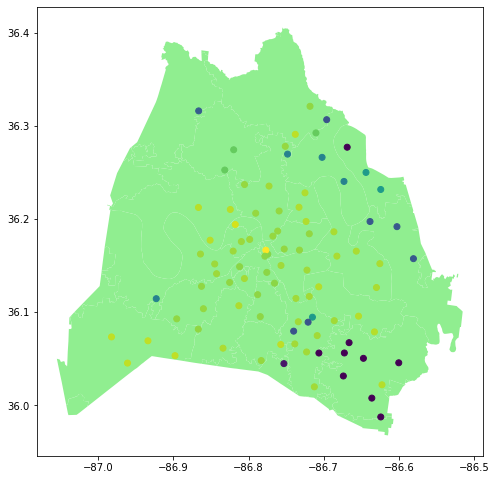

In [41]:
ax = zipcodes.plot(figsize = (8, 10), color = 'lightgreen')
sirens_by_zip.plot( ax = ax, column = 'Zip');
plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [42]:
zipcodes.geometry.centroid

<ipython-input-42-2dee0cdaba00>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zipcodes.geometry.centroid


0     POINT (-86.69477 36.25433)
1     POINT (-86.72635 36.21605)
2     POINT (-86.77467 36.10566)
3     POINT (-86.78551 36.04148)
4     POINT (-87.02866 36.00026)
5     POINT (-87.03712 36.08997)
6     POINT (-86.86263 36.38001)
7     POINT (-86.97531 36.06283)
8     POINT (-86.76433 36.33621)
9     POINT (-86.80157 36.13335)
10    POINT (-86.63653 35.98113)
11    POINT (-86.72226 36.00938)
12    POINT (-86.91816 36.15605)
13    POINT (-86.73098 36.18090)
14    POINT (-86.69470 36.00387)
15    POINT (-86.85733 36.37882)
16    POINT (-86.72570 36.00942)
17    POINT (-86.66093 36.10779)
18    POINT (-86.82996 36.27880)
19    POINT (-86.78726 36.28724)
20    POINT (-86.89487 36.32034)
21    POINT (-86.68513 35.99434)
22    POINT (-86.64118 36.25192)
23    POINT (-86.98674 36.15655)
24    POINT (-86.78317 36.16682)
25    POINT (-86.68331 35.99201)
26    POINT (-86.76289 36.39920)
27    POINT (-86.89039 36.20505)
28    POINT (-86.52221 36.13926)
29    POINT (-86.67866 35.98840)
30    POIN

In [44]:
#find the center of the larger (more southern) polygon and look at it
center = zipcodes.geometry.centroid[42]
print(center)

POINT (-86.77676762469858 36.23245257407244)


<ipython-input-44-f2bbf7b010f5>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zipcodes.geometry.centroid[42]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [45]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407244, -86.77676762469858]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [52]:
#create our map of Nashville with all the Zip Codes and show it
map_nash = folium.Map(location =  area_center, zoom_start = 11)
map_nash

#### Next, let's add our 37207 polygon and bus stop markers.

In [56]:
Next, let's add zipcodes and Siren locations

SyntaxError: unexpected character after line continuation character (<ipython-input-56-9645292e22d2>, line 1)

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [60]:
i = 0
for row_index, row_values in sirens_by_zip.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
Site Name                           Ezell Road Park
Address                          5135 Harding Place
City                                      Nashville
Zip                                           37211
Siren Power                               Eclipse 8
lat                                       36.090944
lng                                      -86.686028
geometry       POINT (-86.68602799999999 36.090944)
index_right                                      49
zip                                           37211
po_name                                   NASHVILLE
Name: 0, dtype: object
------------------------- 
index is 13
values are:
 
Site Name            Old Hickory Beach Park
Address        Swinging Bridge & Burnett Rd
City                              Nashville
Zip                                   37138
Siren Power                             508
lat                               36.094667
lng                              -86.715056
geometry       POIN

#### Create Nashville Map again with additional features:
- add the zipcode area outline (zipcodes)
- iterate through the sirens by Zip to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom marker if desired with a [font-awesome icon](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup
    - add the marker to  `map_nash`
- display `map_nash`

In [66]:
#draw our zip code area: Nashville
map_nash = folium.Map(location =  area_center, zoom_start = 11)

folium.GeoJson(zipcodes).add_to(map_nash)

#iterate through sirens by location to create locations and markers 
#for each siren location
#remember for Folium locations, lat is listed first!!

for row_index, row_values in sirens_by_zip.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="red",icon="bullhorn", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_nash)
map_nash.save('../maps/map_nash.html')

#display our map
map_nash

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [67]:
folium.Map?

In [70]:
cluster_map_nash = folium.Map(location =  area_center, zoom_start = 11)

#create a marker cluster
marker_cluster = MarkerCluster(zipcodes).add_to(cluster_map_nash)

folium.GeoJson(zipcodes).add_to(cluster_map_nash)

# inside the loop add each marker to the cluster
for row_index, row_values in sirens_by_zip.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="red",icon="bullhorn", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_nash.save('../maps/clusternash.html')

cluster_map_nash  

RecursionError: maximum recursion depth exceeded while calling a Python object

In [71]:
#draw our zip code area
map_nash = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(zipcodes).add_to(map_nash)

#create a list of locations and pass them to FastMarkerCluster()
locations = sirens_by_zip[['lat', 'lng']].values.tolist()
map_nash.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_nash